<a href="https://colab.research.google.com/github/rinnarachma/latihan-DA/blob/main/TUGAS_UAS_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS UAS - PREDIKSI CHURN PELANGGAN**

# **ANALISA DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sea
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Memuat dataset
url = "https://drive.google.com/uc?export=download&id=1SEpVMpj5HFlqmlzqQE8Yt7Q6tzCMBiNt"
data = pd.read_csv(url)

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

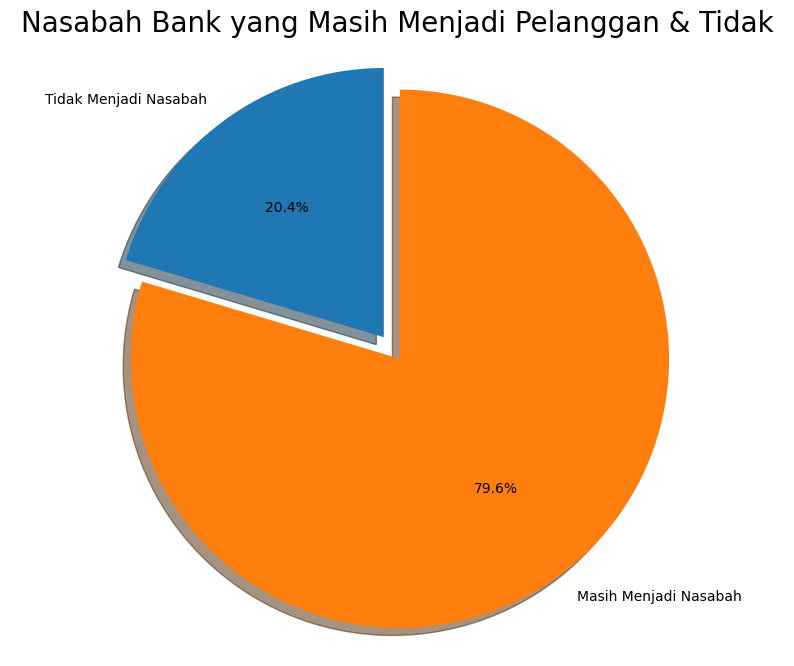

In [ ]:
labels = 'Tidak Menjadi Nasabah', 'Masih Menjadi Nasabah'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = mp.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
mp.title("Nasabah Bank yang Masih Menjadi Pelanggan & Tidak", size = 20)
mp.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

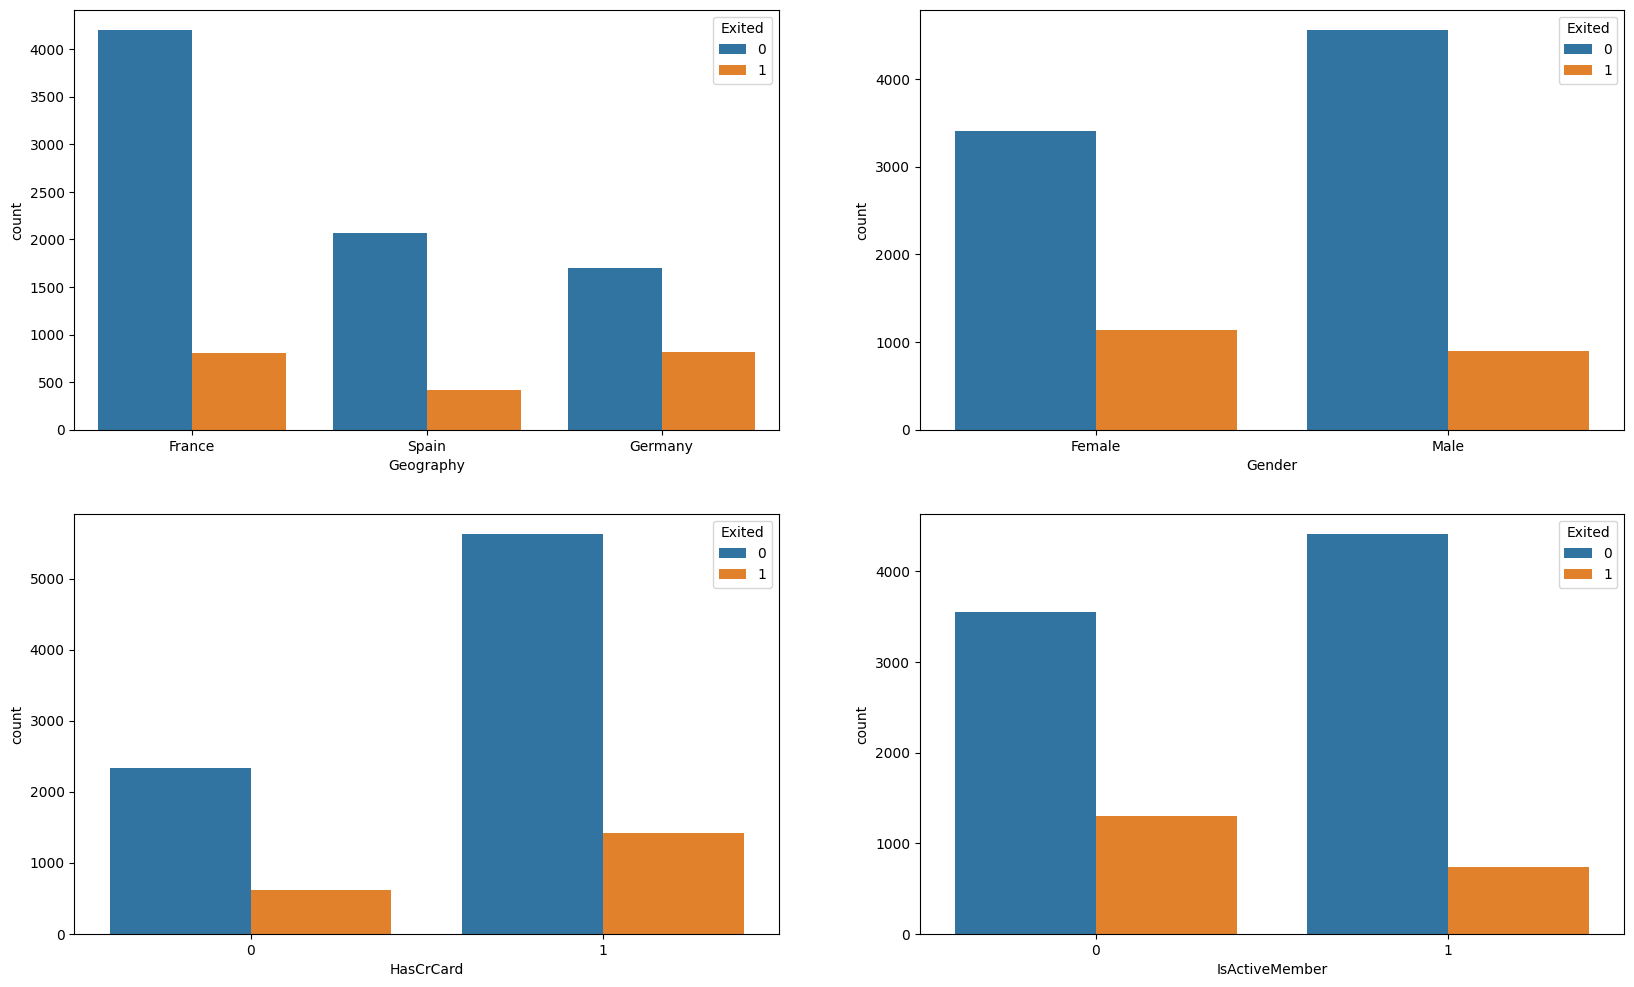

In [ ]:
fig, axarr = mp.subplots(2, 2, figsize=(20, 12))
sea.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sea.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sea.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sea.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

# **PENGUJIAN MODEL**

In [ ]:
# Preprocessing data
# Menghapus kolom yang tidak diperlukan untuk pemodelan
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
# Melakukan encoding pada variabel kategori
data = pd.get_dummies(data, columns=['Geography', 'Gender'])

In [ ]:
# Memisahkan fitur dan label
X = data.drop(columns=['Exited'])
y = data['Exited']

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RANDOM FOREST

In [ ]:
# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluasi model Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

Random Forest Classifier:
Accuracy: 0.865
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000

Confusion Matrix:
 [[1546   61]
 [ 209  184]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.75 %


## GRADIENT BOOSTING

In [ ]:
# Model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluasi model Gradient Boosting
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))


Gradient Boosting Classifier:
Accuracy: 0.864
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Confusion Matrix:
 [[1542   65]
 [ 207  186]]


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.25 %


# **EVALUASI HASIL DENGAN CROSS VALIDATION**

##**Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Memuat dataset
url = "https://drive.google.com/uc?export=download&id=1SEpVMpj5HFlqmlzqQE8Yt7Q6tzCMBiNt"
data = pd.read_csv(url)

In [ ]:
# Select features and target variable
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

X = data[features]
y = data[target]

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8515 0.8615 0.853  0.857  0.8505]
Mean CV Score: 0.8547


## **Gradient Bosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Memuat dataset
url = "https://drive.google.com/uc?export=download&id=1SEpVMpj5HFlqmlzqQE8Yt7Q6tzCMBiNt"
data = pd.read_csv(url)

In [ ]:
# Select features and target variable
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

X = data[features]
y = data[target]

In [ ]:
# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(gb_classifier, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8595 0.8585 0.853  0.8655 0.849 ]
Mean CV Score: 0.8571


## **Uji Cross-validation dengan menggunakan accuracy untuk setiap fold**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import ttest_rel, friedmanchisquare

In [ ]:
# Memuat dataset
url = "https://drive.google.com/uc?export=download&id=1SEpVMpj5HFlqmlzqQE8Yt7Q6tzCMBiNt"
data = pd.read_csv(url)

In [ ]:
# Memilih fitur-fitur dan variabel target
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
            'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'Exited'

X = data[features]
y = data[target]

In [ ]:
# Inisialisasi model-model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Melakukan cross-validation 10 fold dan mendapatkan label prediksi
rf_predicted = cross_val_predict(rf_classifier, X_scaled, y, cv=10)
gb_predicted = cross_val_predict(gb_classifier, X_scaled, y, cv=10)

In [ ]:
# Menghitung akurasi untuk setiap fold
rf_accuracy_per_fold = accuracy_score(y, rf_predicted)
gb_accuracy_per_fold = accuracy_score(y, gb_predicted)

In [ ]:
# Melakukan uji t yang berpasangan
t_statistic, p_value = ttest_rel(rf_accuracy_per_fold, gb_accuracy_per_fold)

print("Random Forest Accuracy per Fold:", rf_accuracy_per_fold)
print("Gradient Boosting Accuracy per Fold:", gb_accuracy_per_fold)
print("Paired t-test p-value:", p_value)

Random Forest Accuracy per Fold: 0.8539
Gradient Boosting Accuracy per Fold: 0.8579
Paired t-test p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


# **VISUALISASI**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = rf.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



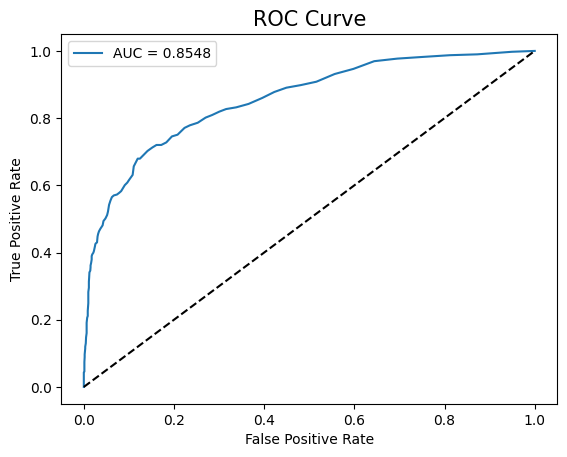

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rf.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
mp.plot(fpr, tpr, label='AUC = %0.4f' %auc)
mp.plot(fpr, fpr, linestyle = '--', color='k')
mp.xlabel('False Positive Rate')
mp.ylabel('True Positive Rate')
mp.title('ROC Curve', size = 15)
mp.legend()

In [ ]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



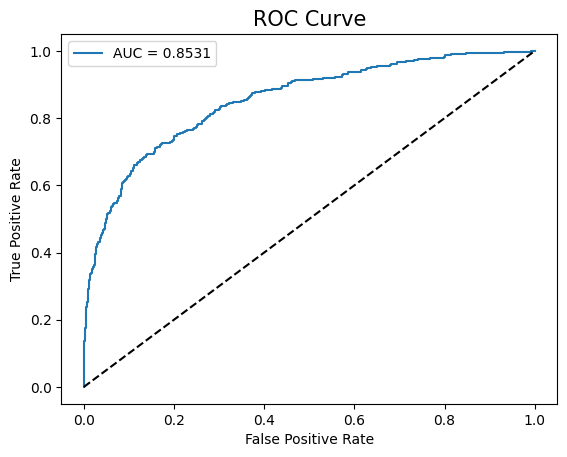

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
mp.plot(fpr, tpr, label='AUC = %0.4f' %auc)
mp.plot(fpr, fpr, linestyle = '--', color='k')
mp.xlabel('False Positive Rate')
mp.ylabel('True Positive Rate')
mp.title('ROC Curve', size = 15)
mp.legend()